In [2]:
import fenics as fe
import matplotlib.pyplot as plt
import PySimpleGUI as sg
import time

from ipywidgets import IntProgress
from IPython.display import display

In [3]:
def logProg(sequence, every=10):
    
    progress = IntProgress(min=0, max=len(sequence), value=0)
    display(progress)

    for index, record in enumerate(sequence):
        
        if index % every == 0:
            progress.value = index
        yield record
    progress.value = len(sequence)

The heat Equation:
df=df^2+g
x=[0,1]
f(0)=f(1)=0

In [4]:
n_elements = 10000  #number of elements
mesh = fe.UnitIntervalMesh(n_elements)  #Create mesh

#Create space
space = fe.FunctionSpace(mesh, "Lagrange", 1)

In [5]:
#Boundaries
bound1 = fe.Constant(0.7)

def check_boudary(x, boundary):
    return boundary

# Constant bounaries(Dirichlet)
boundary_condition = fe.DirichletBC(
    space,
    bound1,
    check_boudary,
)

In [6]:
# Initial condition
initial_condition = fe.Expression('1', degree=1)
#Discretize the initial condition
f0 = fe.interpolate(initial_condition, space)


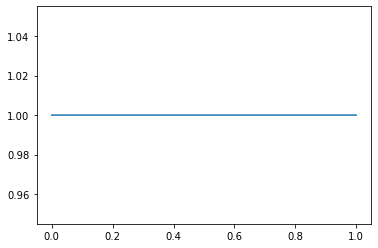

In [7]:
# Create plot
plt.figure()
fe.plot(f0, label='time=0');

In [8]:
#Time step
dt=0.1
n_dt = 5
time_current = 0.0

force= fe.Constant(0.0)

In [9]:
# Create Finite elements problem
f_trial = fe.TrialFunction(space)  #new point in time
v_test = fe.TestFunction(space)  #old point in time

weak_form = (f_trial * v_test * fe.dx +
             dt * fe.dot(fe.grad(f_trial), fe.grad(v_test)) * fe.dx -
             (f0 * v_test * fe.dx + dt * force * v_test * fe.dx))
weak_form_right = fe.rhs(weak_form)
weak_form_left = fe.lhs(weak_form)

In [10]:
# Solving function
f_sol = fe.Function(space)

IntProgress(value=0, max=5)

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


Text(0, 0.5, 'f pos')

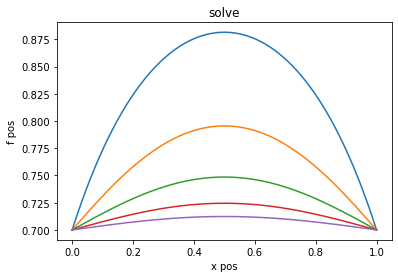

In [11]:
# Solving
for i in logProg( range(n_dt),every=1):
    time_current += dt
       
    fe.solve(weak_form_left == weak_form_right, f_sol, boundary_condition)
    f0.assign(f_sol)
    
    fe.plot(f_sol, label=f't={time_current:1.1f}')

# plt.legend()
plt.title("solve")
plt.xlabel('x pos')
plt.ylabel('f pos')

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


Text(0, 0.5, 'f pos')

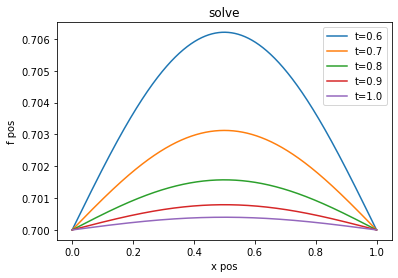

In [12]:
# Solving
for i in range(n_dt):
    time_current += dt
       
    fe.solve(weak_form_left == weak_form_right, f_sol, boundary_condition)
    f0.assign(f_sol)
    
    fe.plot(f_sol, label=f't={time_current:1.1f}')
plt.legend()
plt.title("solve")
plt.xlabel('x pos')
plt.ylabel('f pos')

In [13]:
for i in range(10):
    sg.one_line_progress_meter('This is my progress meter!', i+1, 10, '-key-')
    time.sleep(0.1)